# A8: Unsupervised Kmeans Clustering 

In this analysis, we are employing K-Means clustering to segment customers of a mall based on their shopping behavior, specifically using their Annual Income and Spending Score
This will be achieved by: 
1. Data Selection: We focus on the relevant features: Annual Income (in thousands of dollars) and Spending Score (a score assigned to customers based on their purchasing habits).

2. K-Means Algorithm: We apply the K-Means clustering algorithm, which groups customers into distinct clusters based on the similarities in these two features. The algorithm works by:
- Initializing a predefined number of clusters (k).
- Iteratively assigning customers to the nearest cluster centroid based on their feature values.
- Updating the centroids based on the mean of the assigned customers until convergence.
  
3. Elbow Method: To determine the optimal number of clusters (k):
We calculate the Within-Cluster Sum of Squares (WCSS) for different values of k (from 1 to 10).
By plotting WCSS against the number of clusters, we look for the "elbow point," which indicates where increasing the number of clusters yields diminishing returns in WCSS reduction. This point helps us decide the best k for our analysis.

4. Insights: After fitting the model, we can analyze the resulting clusters to identify distinct customer segments. This can guide marketing strategies and enhance customer engagement by targeting specific groups based on their income and spending behavior.

## Import libraries

The code below imports the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Get the data

In [2]:
data = pd.read_csv('Mall_Customers.csv')

## Explore the data

In [3]:
data.head()
# Displaying the first few rows of the DataFrame to get a quick overview of the data structure, including the column names and the initial values, which helps in understanding the dataset's layout and contents.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()
# Retrieving a summary of the DataFrame, including data types and non-null counts, to assess the data structure and identify missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()
# Generating summary statistics for numerical columns, including count, mean, min, max, and quartiles, to understand the distribution of the data.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Clean the data

In [6]:
data.isnull().sum()  
# Checking for missing values in each column to identify any gaps in the dataset that need to be addressed before analysis.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X = data.drop(columns=['CustomerID', 'Gender', 'Age']).values
# dropping any unnecessary columns 

In [8]:
scaler = StandardScaler()
# Initializing the StandardScaler to standardize the feature set, ensuring that each feature will have a mean of 0 and a standard deviation of 1.

X_scaled = scaler.fit_transform(X)
# Applying the fit_transform method to the feature set X, which scales the data appropriately for analysis, allowing for more accurate model training and evaluation.

The line initializes a StandardScaler object to standardize the features in the dataset, and then it applies this scaling to the feature set, transforming the data so that each feature has a mean of 0 and a standard deviation of 1.

## Data Visulazations

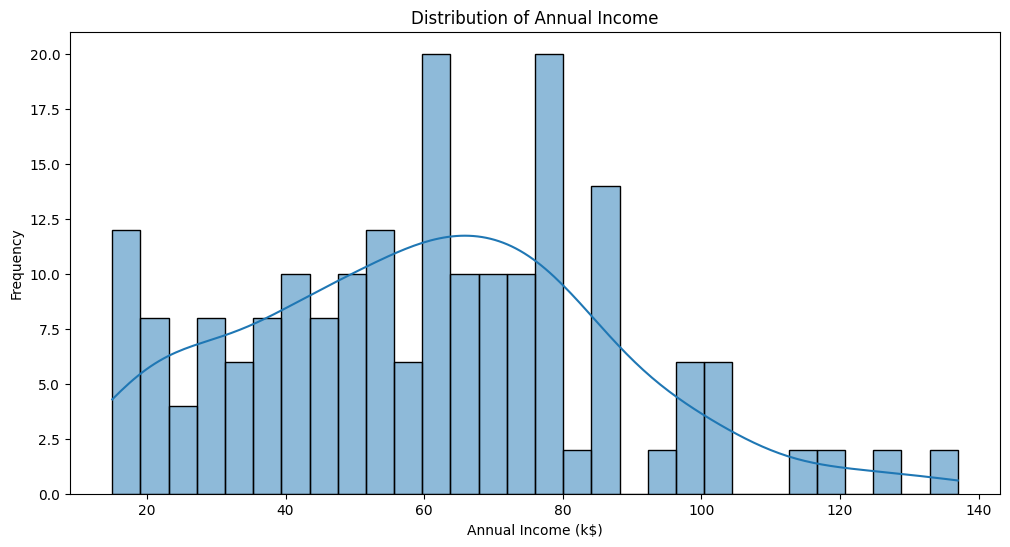

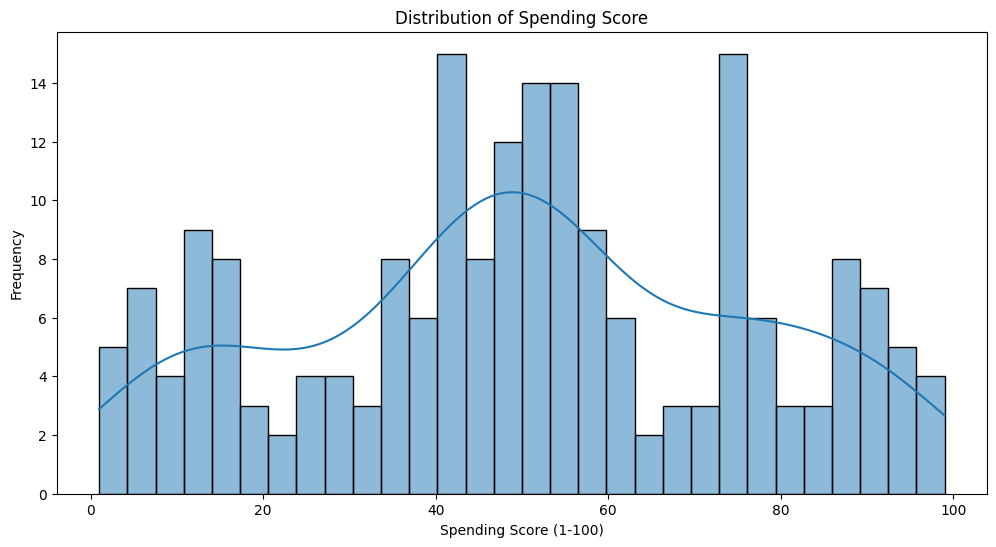

In [9]:
# Histogram of features to visualize the distribution of 'Annual Income (k$)' with a kernel density estimate for better understanding of the data's spread.
plt.figure(figsize=(12, 6))
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Histogram of features to visualize the distribution of 'Spending Score (1-100)' with a kernel density estimate, highlighting how spending behavior varies among customers.
plt.figure(figsize=(12, 6))
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

The first histogram above shows the income distribution amongst mall customers is highly concentrated around the middle-income level (20-80k), with the peaks at 20-40-k and 70-80-k on either side. High-income earners, above 100k, are quite rare. This implies marketing efforts should be initially focused on middle-income shoppers. 

The second histogram shows Spending scores tend to form distinct clusters, the majority between values of 40-80, indicating moderate spending behavior. Very few customers scored in the ranges of 0-20 or 90-100; thus, the marketing strategies should guide towards the middle range scores for maximum engagement.

## Plot the data

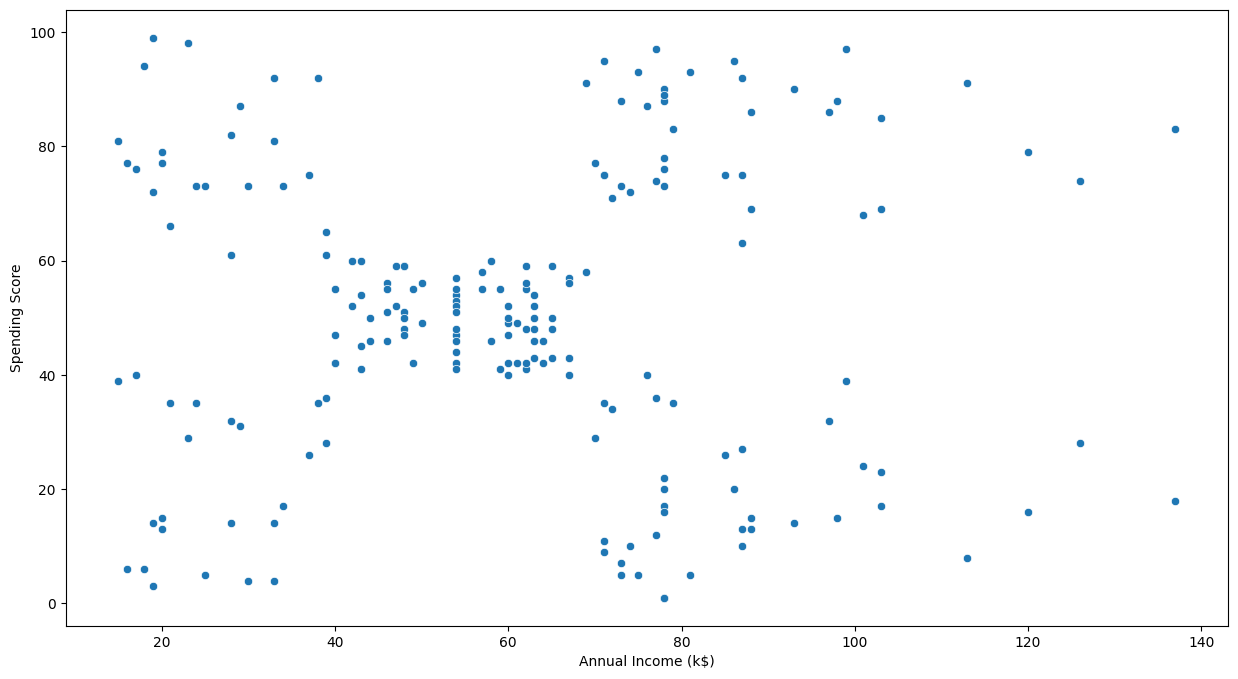

In [10]:
# Creating a scatter plot to visualize the relationship between 'Annual Income (k$)' and 'Spending Score', helping to identify potential clusters or patterns in the data.
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1]) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

## Finding the number of using the Elbow method

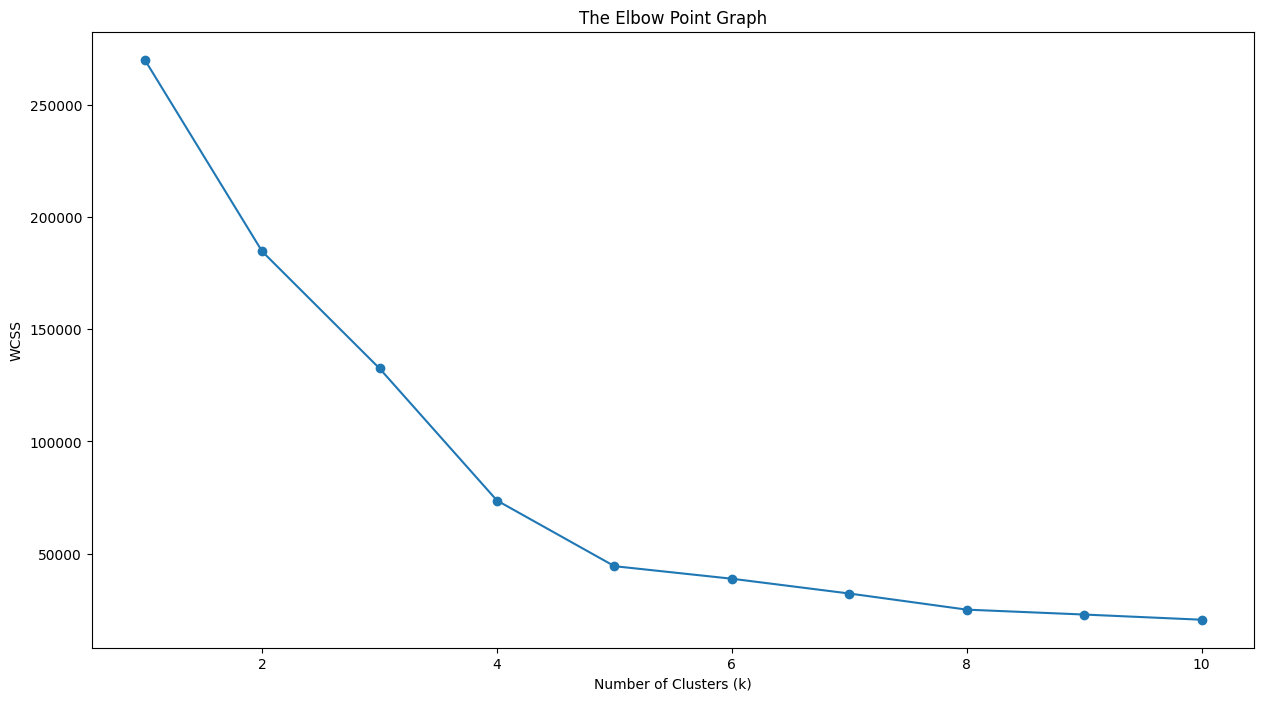

In [11]:
# Calculating the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (1 to 10) to determine the optimal number of clusters using the Elbow Method.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Point graph to visualize WCSS against the number of clusters, helping to identify the point where adding more clusters yields diminishing returns.
plt.figure(figsize=(15, 8))
plt.plot(range(1, 11), wcss, marker='o') 
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Training the k-means algorithim

In [12]:
# Initializing the KMeans algorithm with 5 clusters, using 'k-means++' for centroid initialization and a fixed random state for reproducibility, then fitting the model and predicting cluster labels for the scaled data.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X_scaled)

## Centroid points

In [13]:
# Retrieving the coordinates of the cluster centers identified by the KMeans algorithm, which represent the average position of all points within each cluster in the feature space.
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788]])

## Visualize the clusters formed

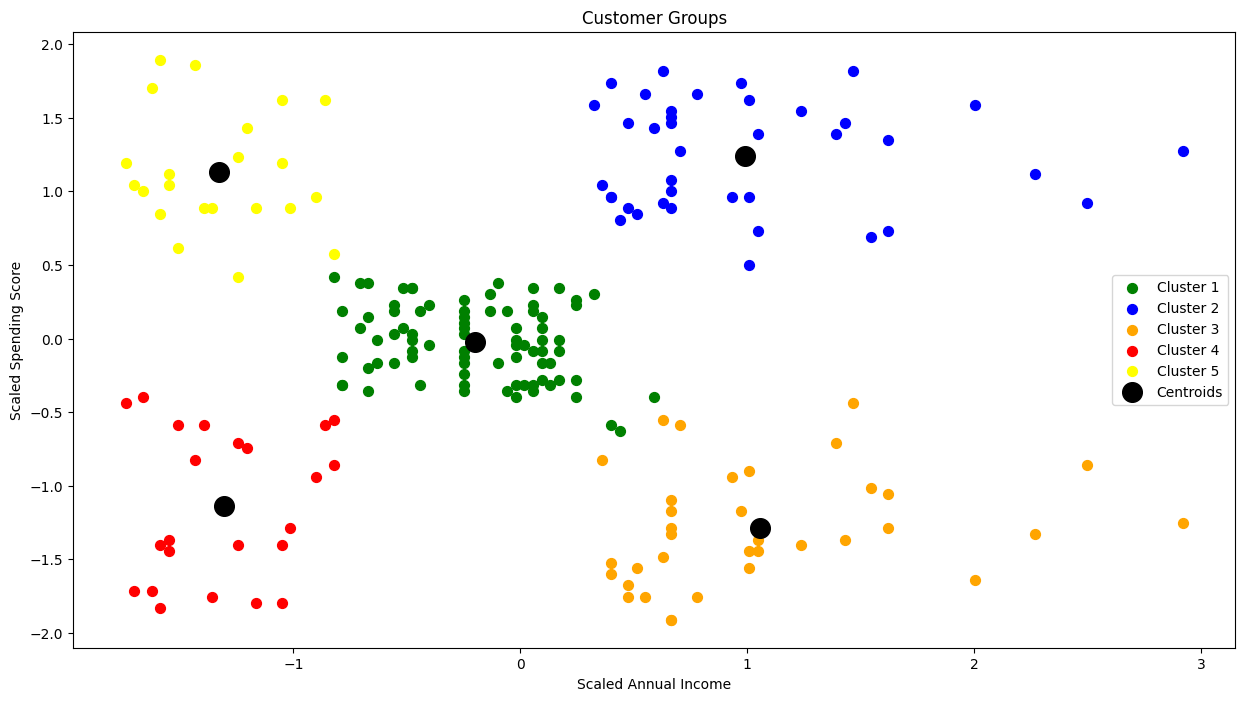

In [17]:
# Plotting the clusters in a scatter plot, with each cluster represented by a different color, and the cluster centers marked in black to visualize the final groupings in the scaled feature space.
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[Y == 0, 0], X_scaled[Y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_scaled[Y == 1, 0], X_scaled[Y == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[Y == 2, 0], X_scaled[Y == 2, 1], s=50, c='orange', label='Cluster 3')
plt.scatter(X_scaled[Y == 3, 0], X_scaled[Y == 3, 1], s=50, c='red', label='Cluster 4')
plt.scatter(X_scaled[Y == 4, 0], X_scaled[Y == 4, 1], s=50, c='yellow', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

## Interpretation of Results

This scatter plot shows customer groups based on their Scaled Annual Income (x-axis) and Scaled Spending Score (y-axis), with distinct clusters represented by different colors and centroids marked by black dots. Each color-coded cluster represents a unique customer group with similar income and spending behaviors:
1. Cluster 1-Green: Customers with low to moderate income and an average spending score. This group could represent individuals with a moderate spending habit, regardless of their relatively lower income.

2. Cluster 2-Blue: Customers with high income and high spending scores, likely indicating high-spending individuals who are more financially able to allocate a significant portion of their income to spending.

3. Cluster 3-Orange: Customers with moderate income but low spending scores. This group may include customers who, despite having some disposable income, tend to save more and spend less.

4. Cluster 4-Red: Individuals with both low income and low spending scores, possibly indicating those with limited financial means and lower purchasing behavior.

5. Cluster 5-Yellow: Customers with high income but moderate spending scores. These individuals have higher income but do not spend as much relative to their income, perhaps indicating a preference for saving or selective spending.

## Conclusion

K-Means clustering analysis enabled us to cluster mall customers by their Annual Income and Spending Score into certain groups. By selecting these two relevant features, we captured key aspects of shopping behavior which let us point out some meaningful patterns in the spending habits of our customers.

Using the elbow method, we were able to identify the optimal number of clusters, 'k', that will provide the most benefit in balancing between how tightly-clustered certain points are - within clusters - and also the model's complexity overall. This means that these are appoints that either vary greatly from other points in their cluster or else that limit within-cluster variance by essentially gathering over those points in unique profiles of customer behavior.

This produced segments containing distinct types of customers-from high income and high spending to those with more conservative spending habits. For instance, certain clusters showed high-income but selective spenders, while others exposed budget-based customers with reduced income and spending scores. The characteristics of these segments would offer insight that aids in targeting marketing and engagement strategies.

By understanding these segments, mall management can better tailor promotions, uniquely customize their interactions with their customers, and optimize their product offerings so that they satisfy each particular group. Consequently, providing the right incentives could improve customer satisfaction and encourage loyalty through the correlation of marketing with specific spending behavior and income level. 